<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_iris_tree.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab -- Iris tree

Investigate decision-tree sensitivity with iris dataset
* This was an assignment
* Raschka and Geron both investigate the decision tree model with the Iris dataset.
    * Rachka's [ch03.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb)
        * Look at the figure created by Cell 38 in Raschka's notebook
    * Geron's's [06_decision_trees.ipynb](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb)
        * Look at the figure created by Cell 9 in Geron's notebook
        * Note: You do not need a copy of Geron's text -- the example in Cell 9 is not discussed in his book.
* Primary reference: [ch03.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb)

In [1]:
# Cell 3 from Raschka ch03.ipynb
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
# Cell 4
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
# Cell 11
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

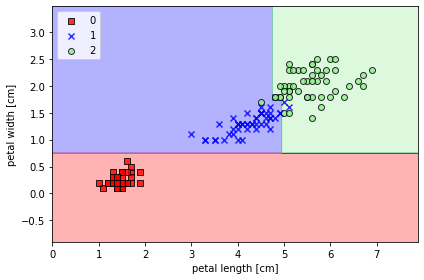

In [4]:
# Cell 38 from Raschka's ch03.ipynb
# Raschka uses Gini impurity, max_depth=4, random_state=1
from sklearn.tree import DecisionTreeClassifier

# Raschka default (uses max_depth=4)
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

tree_model.fit(X_train, y_train)

# Raschka distinques train & test sets in decision-region plot, I do not
plot_decision_regions(X, y, classifier=tree_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

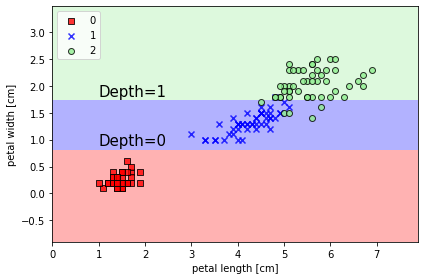

In [5]:
# Cell 8 & 9 from Geron
# Geron uses default criterion, max_depth=2, random_state=40
# His plot has Depth=0 and Depth=1 boundaries parallel to X-axis
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweak = X[not_widest_versicolor]
y_tweak = y[not_widest_versicolor]

tree_model = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_model.fit(X_tweak, y_tweak)

plot_decision_regions(X, y, classifier=tree_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=15)
plt.show()